In [1]:
import numpy as np
import torch
from environment import Floor1
from fcn_resnet import FCQResNet as FCQNet
from fc_dqn import get_action

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
model_path = "results/models/FCDQN_1009_2114.pth"

FCQ = FCQNet(1, 1).cuda()
FCQ.load_state_dict(torch.load(model_path))
FCQ.eval()
env = Floor1(resolution=64, box_norm=True, action_norm=False, block_size_min=0.1, block_size_max=0.25)

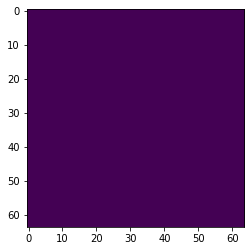

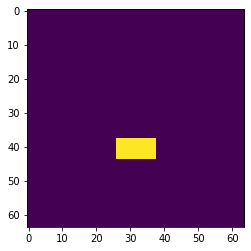

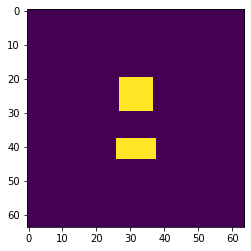

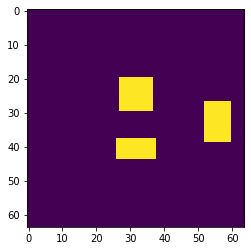

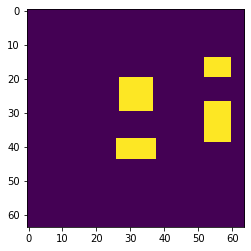

In [3]:
obs = env.reset()
state, block = obs

for t_step in range(5):
    plt.imshow(state)
    plt.show()
    action, q_map = get_action(env, FCQ, state, block, epsilon=0.0, pre_action=None, with_q=True)
    obs, reward, done = env.step(action)
    state, block = obs

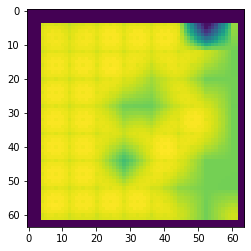

In [4]:
block1 = np.array([0.1, 0.1])
action, q1 = get_action(env, FCQ, state, block1, epsilon=0.0, pre_action=None, with_q=True)
plt.imshow(q1[0])
plt.show()

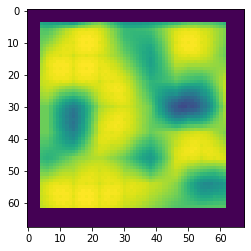

In [56]:
block2 = np.array([0.2, 0.2])
action, q2 = get_action(env, FCQ, state, block2, epsilon=0.0, pre_action=None, with_q=True)
plt.imshow(q2[0])
plt.show()

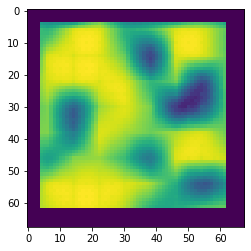

In [57]:
block3 = np.array([0.3, 0.3])
action, q3 = get_action(env, FCQ, state, block3, epsilon=0.0, pre_action=None, with_q=True)
plt.imshow(q3[0])
plt.show()

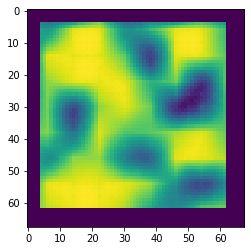

In [58]:
block3 = np.array([0.4, 0.4])
action, q3 = get_action(env, FCQ, state, block3, epsilon=0.0, pre_action=None, with_q=True)
plt.imshow(q3[0])
plt.show()